In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Embedding
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [47]:
epochs=4
batch_size=128
n_dim=64
n_unique_words=5000
n_words_skip=50
max_review_length=100
pad_type=trunc_type='pre' 

n_dense=64
dropout=0.5

In [48]:
#Loading Data
(xtrain,ytrain),(xvalid,yvalid)= imdb.load_data(num_words=n_unique_words,skip_top=n_words_skip)

In [49]:
xtrain[0]  # 0 is reserved dfor padding
# 2 is uknown word

[2,
 2,
 2,
 2,
 2,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 2,
 173,
 2,
 256,
 2,
 2,
 100,
 2,
 838,
 112,
 50,
 670,
 2,
 2,
 2,
 480,
 284,
 2,
 150,
 2,
 172,
 112,
 167,
 2,
 336,
 385,
 2,
 2,
 172,
 4536,
 1111,
 2,
 546,
 2,
 2,
 447,
 2,
 192,
 50,
 2,
 2,
 147,
 2025,
 2,
 2,
 2,
 2,
 1920,
 4613,
 469,
 2,
 2,
 71,
 87,
 2,
 2,
 2,
 530,
 2,
 76,
 2,
 2,
 1247,
 2,
 2,
 2,
 515,
 2,
 2,
 2,
 626,
 2,
 2,
 2,
 62,
 386,
 2,
 2,
 316,
 2,
 106,
 2,
 2,
 2223,
 2,
 2,
 480,
 66,
 3785,
 2,
 2,
 130,
 2,
 2,
 2,
 619,
 2,
 2,
 124,
 51,
 2,
 135,
 2,
 2,
 1415,
 2,
 2,
 2,
 2,
 215,
 2,
 77,
 52,
 2,
 2,
 407,
 2,
 82,
 2,
 2,
 2,
 107,
 117,
 2,
 2,
 256,
 2,
 2,
 2,
 3766,
 2,
 723,
 2,
 71,
 2,
 530,
 476,
 2,
 400,
 317,
 2,
 2,
 2,
 2,
 1029,
 2,
 104,
 88,
 2,
 381,
 2,
 297,
 98,
 2,
 2071,
 56,
 2,
 141,
 2,
 194,
 2,
 2,
 2,
 226,
 2,
 2,
 134,
 476,
 2,
 480,
 2,
 144,
 2,
 2,
 2,
 51,
 2,
 2,
 224,
 92,
 2,
 104,
 2,
 226,
 65,
 2,
 2,
 1334,
 88,
 2

In [50]:
xtrain[0:5]

array([list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2]),
       list([2, 194, 1153, 194, 2, 78, 228, 2, 2, 1463, 4369, 2, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 20

In [51]:
for i in xtrain[0:5]:
    print(len(i))

218
189
141
550
147


In [52]:
ytrain[0:6]

array([1, 0, 0, 1, 0, 0])

In [53]:
# Restoring words from index
word_index=keras.datasets.imdb.get_word_index()
word_index={k:(v+3) for k,v in word_index.items()}
# we are inserting new words into word index so we are increasing indexes of words by 3
word_index['PAD']=0
word_index['START']=1
word_index['UNK']=2

In [54]:
#flipping words and keys
index_word={v:k for k,v in word_index.items()}


In [55]:
index_word

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [56]:
" ".join(index_word[id] for id in xtrain[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly UNK UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done do

In [57]:
#Incase we want to load all words 
(all_xtrain,_),(all_test,_)=imdb.load_data()

In [58]:
" ".join(index_word[id] for id in all_xtrain[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [61]:
xtrain1=pad_sequences(xtrain,maxlen=max_review_length,padding=pad_type,truncating=trunc_type,value=0)

In [62]:
xvalid1=pad_sequences(xvalid,maxlen=max_review_length,padding=pad_type,truncating=trunc_type,value=0)

In [63]:
[len(i) for i in xtrain1[0:6]]  # all are of same length now

[100, 100, 100, 100, 100, 100]

In [64]:
# Design NN architecture
model=Sequential()
model.add(Embedding(n_unique_words,n_dim,input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
model.fit(xtrain1,ytrain,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(xvalid1,yvalid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 154us/step - loss: 0.5566 - acc: 0.6910 - val_loss: 0.3583 - val_acc: 0.8414
Epoch 2/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.2809 - acc: 0.8871 - val_loss: 0.3481 - val_acc: 0.8447
Epoch 3/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.1150 - acc: 0.9652 - val_loss: 0.4235 - val_acc: 0.8340
Epoch 4/4
25000/25000 [==============================] - 3s 124us/step - loss: 0.0242 - acc: 0.9960 - val_loss: 0.5292 - val_acc: 0.8316


In [69]:
y_hat=model.predict_proba(xvalid1)

In [70]:
y_hat[0]

array([0.0885691], dtype=float32)

In [71]:
import matplotlib.pyplot as plt

(array([ 9385.,   904.,   608.,   522.,   426.,   469.,   509.,   615.,
         1020., 10542.]),
 array([1.2624917e-08, 1.0000001e-01, 2.0000000e-01, 3.0000001e-01,
        4.0000001e-01, 5.0000000e-01, 6.0000002e-01, 6.9999999e-01,
        8.0000001e-01, 8.9999998e-01, 1.0000000e+00], dtype=float32),
 <a list of 10 Patch objects>)

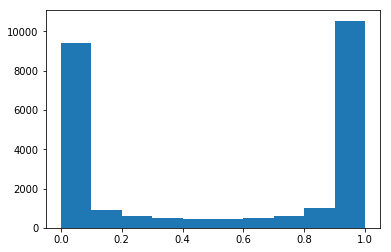

In [72]:
plt.hist(y_hat)

In [73]:
auc_cur=roc_auc_score(yvalid,y_hat)*100.0

In [74]:
auc_cur

91.51464064000001

In [75]:
#Looking individual results
float_yhat=[]
for y in y_hat:
    float_yhat.append(y[0])

In [78]:
ydf=pd.DataFrame(list(zip(float_yhat,yvalid)),columns=['yhat','y'])

In [80]:
ydf.head()

,yhat,y
0,0.088569,0
1,0.999204,1
2,0.912367,1
3,0.575199,0
4,0.999990,1


In [82]:
" ".join(index_word[i] for i in all_test[3])
# some bad words too in this example

"START i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are impossibly involved with the actions on the screen so then why the hell can't we have night vision"

In [83]:
#checking for examples where model predicted wrong
ydf[(ydf.y==0) & (ydf.yhat>0.9)].head(10)

,yhat,y
66,0.998666,0
75,0.997553,0
112,0.997867,0
139,0.907158,0
152,0.998792,0
156,0.980510,0
247,0.932796,0
256,0.966868,0
260,0.962319,0
299,0.966073,0


In [84]:
#checking 247
" ".join(index_word[i] for i in all_test[156])

"START i rented this when it came out on video cassette in 1995 after rewatching it again my idea about it hasn't changed much br br i was an adult then and i'm still an adult now lol br br the illogical elements mentioned by other reviewers didn't bother me this isn't a documentary it's a fantasy story where animals can talk br br while i didn't care for much of the songs i liked the one at the end of the picture where it's sang by barry manilow and another person br br some people seem to make an excuse for it's primitive animation by saying that cgi wasn't used often in animated features but let's not forget that the lion king was released about a year earlier and that packed possibly more excellence than any animated feature that came before it br br but i think it's pretty fair to say that the pebble and the was made on the cheap while the lion king wasn't br br the high points for me in 1995 as well as today is the suspense generated by the few dangerous mostly underwater chase s